In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data
data = pd.read_csv('Crop_Data.csv')
data

,Crop,Season,State,Area,Soil Type,Pesticide Usage,pH,Temperature,Fertilizer Usage,Price,Rainfall
0,Cotton(lint),Kharif,Assam,1739.0,Black Soil,low,Average,Medium,High,2490.092421,3373.20
1,Onion,Whole Year,Assam,7832.0,Alluvial Soil,high,Low,Low,Medium,2348.904922,3520.70
2,Potato,Whole Year,Assam,75259.0,Laterile Soil,low,Average,High,High,2448.287513,2957.40
3,Rice,Autumn,Assam,607358.0,Alluvial Soil,low,Low,High,High,2714.419518,3079.60
4,Rice,Summer,Assam,174974.0,Black Soil,high,Low,Low,Low,2883.356997,2566.70
...,...,...,...,...,...,...,...,...,...,...,...
5368,Wheat,Summer,Odisha,147.0,Black Soil,high,Average,High,High,3707.000000,821.39
5369,Rice,Kharif,Nagaland,141000.0,Black Soil,high,Average,Medium,Medium,3406.000000,2988.96
5370,Wheat,Rabi,Nagaland,1000.0,Black Soil,high,High,Low,High,3949.000000,1492.70
5371,Rice,Kharif,Jammu and Kashmir,275746.0,Black Soil,low,High,High,High,2842.000000,1688.34


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373 entries, 0 to 5372
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crop              5373 non-null   object 
 1   Season            5373 non-null   object 
 2   State             5373 non-null   object 
 3   Area              5373 non-null   float64
 4   Soil Type         5373 non-null   object 
 5   Pesticide Usage   5373 non-null   object 
 6   pH                5373 non-null   object 
 7   Temperature       5373 non-null   object 
 8   Fertilizer Usage  5373 non-null   object 
 9   Price             5373 non-null   float64
 10  Rainfall          5373 non-null   float64
dtypes: float64(3), object(8)
memory usage: 461.9+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,5373.0,394538.865698,1.060867e+06,1.0,2590.000000,22596.000000,211000.000000,10216517.0
Price,5373.0,2553.190129,4.837197e+02,1005.0,2297.975728,2508.496079,2733.320514,4983.0
Rainfall,5373.0,1496.015241,8.785391e+02,62.3,852.500000,1218.400000,2068.050000,6331.1


In [5]:
#Check for missing values
data.isnull().sum()

Crop                0
Season              0
State               0
Area                0
Soil Type           0
Pesticide Usage     0
pH                  0
Temperature         0
Fertilizer Usage    0
Price               0
Rainfall            0
dtype: int64

In [6]:
#Check duplicates
data.duplicated().sum()

0

In [7]:
data['Crop'].unique()

array(['Cotton(lint)', 'Onion', 'Potato', 'Rice', 'Sugarcane', 'Wheat',
       'Groundnut', 'Ragi', 'Banana'], dtype=object)

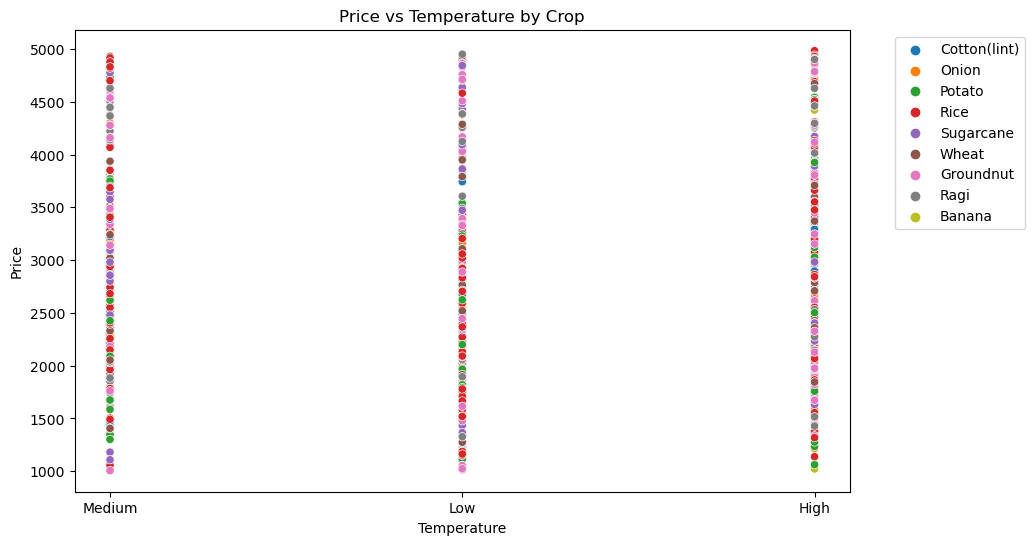

In [8]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Temperature', y='Price', hue='Crop')
plt.title('Price vs Temperature by Crop')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

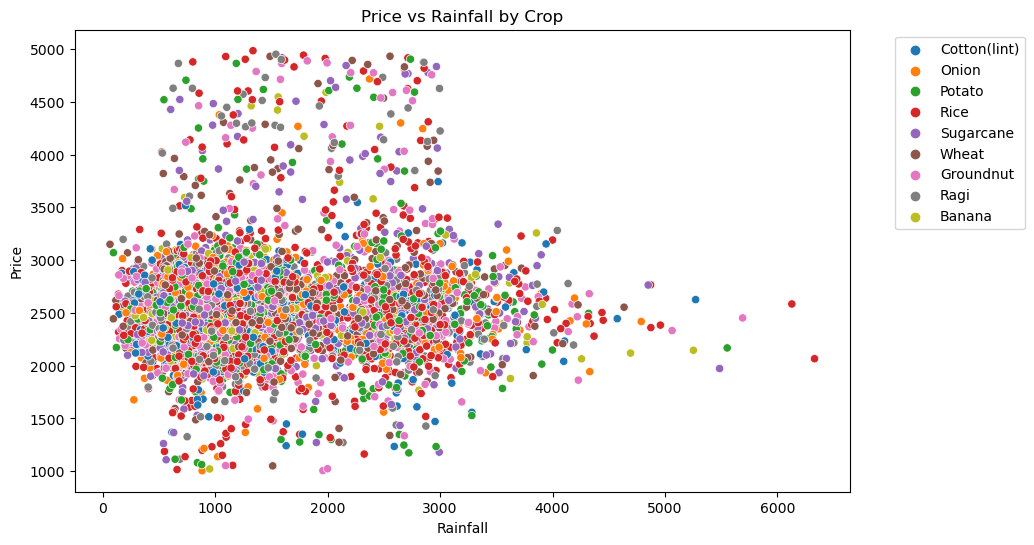

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Rainfall', y='Price', hue='Crop')
plt.title('Price vs Rainfall by Crop')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

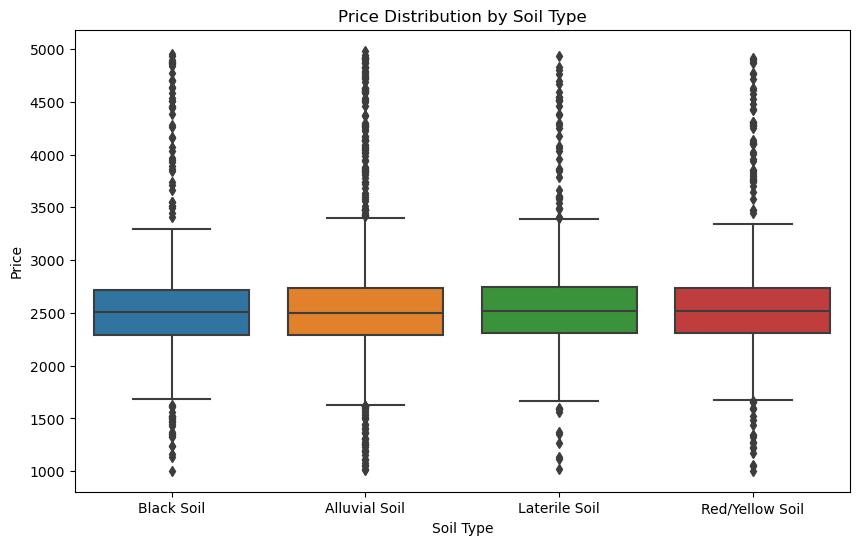

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Soil Type', y='Price')
plt.title('Price Distribution by Soil Type')
plt.show()

In [11]:
cat_column=data.select_dtypes(include='object').columns
num_column=data.select_dtypes(exclude='object').columns

In [12]:
num_column

Index(['Area', 'Price', 'Rainfall'], dtype='object')

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(data[num_column])

In [14]:
num_data=pd.DataFrame(scaled_data,columns=num_column)
num_data

,Area,Price,Rainfall
0,-0.370298,-0.130455,2.136911
1,-0.364554,-0.422361,2.304819
2,-0.300989,-0.216887,1.663581
3,0.200627,0.333343,1.802688
4,-0.206987,0.682622,1.218824
...,...,...,...
5368,-0.371798,2.385508,-0.767966
5369,-0.239014,1.763189,1.699507
5370,-0.370994,2.885844,-0.003774
5371,-0.111988,0.597116,0.218935


In [15]:
from sklearn.preprocessing import OneHotEncoder
# Assuming cat_column is a list of categorical column names
ohe = OneHotEncoder()
encoded_data = ohe.fit_transform(data[cat_column])

In [16]:
# Convert the encoded data to a DataFrame
cat_data = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out())
cat_data

,Crop_Banana,Crop_Cotton(lint),Crop_Groundnut,Crop_Onion,Crop_Potato,Crop_Ragi,Crop_Rice,Crop_Sugarcane,Crop_Wheat,Season_Autumn,...,Pesticide Usage_low,pH_Average,pH_High,pH_Low,Temperature_High,Temperature_Low,Temperature_Medium,Fertilizer Usage_High,Fertilizer Usage_Low,Fertilizer Usage_Medium
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5369,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [17]:
dataset=pd.concat([cat_data,num_data],axis=1)
dataset

,Crop_Banana,Crop_Cotton(lint),Crop_Groundnut,Crop_Onion,Crop_Potato,Crop_Ragi,Crop_Rice,Crop_Sugarcane,Crop_Wheat,Season_Autumn,...,pH_Low,Temperature_High,Temperature_Low,Temperature_Medium,Fertilizer Usage_High,Fertilizer Usage_Low,Fertilizer Usage_Medium,Area,Price,Rainfall
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.370298,-0.130455,2.136911
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.364554,-0.422361,2.304819
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.300989,-0.216887,1.663581
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.200627,0.333343,1.802688
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.206987,0.682622,1.218824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.371798,2.385508,-0.767966
5369,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.239014,1.763189,1.699507
5370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.370994,2.885844,-0.003774
5371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.111988,0.597116,0.218935


In [18]:
X = dataset.drop(columns=['Price'])
y = dataset['Price']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Initialize the models
linear_regressor = LinearRegression()
random_forest_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
svm_regressor = SVR()

In [21]:
# Train the models
linear_regressor.fit(X_train, y_train)
random_forest_regressor.fit(X_train, y_train)
svm_regressor.fit(X_train, y_train)

SVR()

In [22]:
# Make predictions
linear_predictions = linear_regressor.predict(X_test)
random_forest_predictions = random_forest_regressor.predict(X_test)
svm_predictions = svm_regressor.predict(X_test)

In [23]:
# Evaluate the models
linear_mse = mean_squared_error(y_test, linear_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)

In [24]:
# Print the results
print(f'Linear Regression MSE: {linear_mse}')
print(f'Random Forest Regression MSE: {random_forest_mse}')
print(f'SVM Regression MSE: {svm_mse}')

Linear Regression MSE: 1.0115685753764743
Random Forest Regression MSE: 1.0043799754906289
SVM Regression MSE: 1.0646971239950618


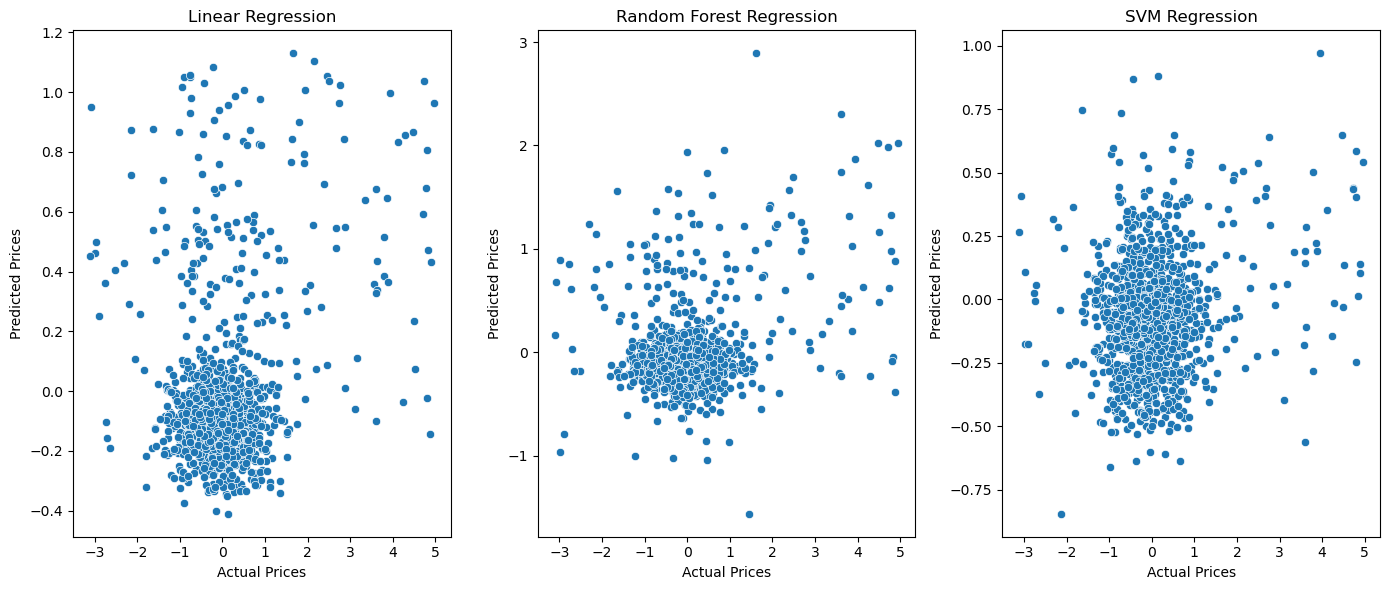

In [25]:
# Plotting the predictions
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=linear_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=random_forest_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Regression')

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=svm_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVM Regression')

plt.tight_layout()
plt.show()